-->> let's Import important Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

--++ Read the file ++--

In [4]:
dataset = pd.read_excel(r"D:\Data Analysis\z_Misc_data\US super EDA py\US Superstore data.xls")

In [13]:
print(dataset.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

--++ calculate the overall size of data ++--

In [7]:
dataset.shape  # Rows and columns count

(9994, 21)

In [6]:
dataset.info()  # Check data types, non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [8]:
dataset.describe() # Summary statistics

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [16]:
dataset.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


--++ check for missing values ++--

In [17]:
dataset.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
dataset.duplicated().sum() # Count duplicate rows

np.int64(0)

-->> Data is Free of Missing values and duplicate values

--++ check for orders in multiple segments ++--

In [19]:
dataset['Segment'].value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

--++ Visulising the Result ++--

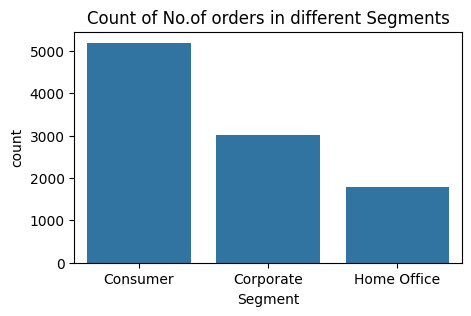

In [26]:
plt.figure(figsize = (5,3))
sns.countplot(x = "Segment", data = dataset)
plt.title('Count of No.of orders in different Segments')
plt.show()

--++ Figuring out unqiue order IDs in data ++--

In [29]:
unique_orders = dataset['Order ID'].nunique()
print(f"Number of unique Order IDs: {unique_orders}")


Number of unique Order IDs: 5009


--++ Finding out the shipping Mode mostly used ++--

In [32]:
dataset['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

--++ Visualizing result ++--

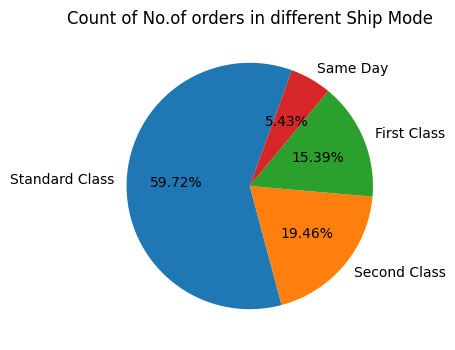

In [49]:
plt.figure(figsize = (4,4))
x = dataset["Ship Mode"].value_counts().index
y = dataset["Ship Mode"].value_counts().values

plt.pie(y, labels = x,startangle = 70, autopct = "%0.2f%%")
plt.title('Count of No.of orders in different Ship Mode')
plt.show()

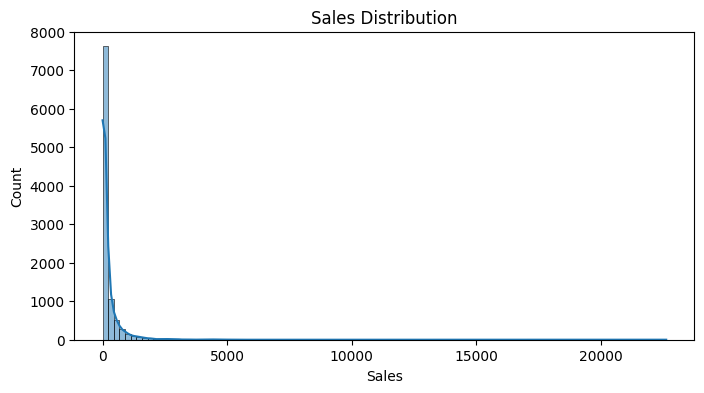

In [16]:
plt.figure(figsize=(8, 4))
sns.histplot(dataset['Sales'], kde=True, bins=100)
plt.title('Sales Distribution')
plt.show()


What is the date range of the dataset?

In [17]:
# Ensure 'Order Date' is in datetime format
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'])

# Date range
print("Date Range:", dataset['Order Date'].min(), "to", dataset['Order Date'].max())


Date Range: 2014-01-03 00:00:00 to 2017-12-30 00:00:00


How many orders were placed per year?

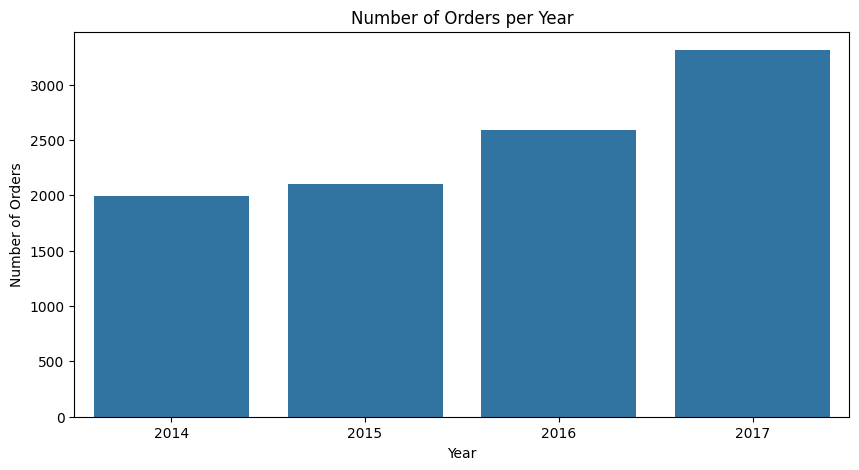

In [18]:
# Extract year from Order Date
dataset['Year'] = dataset['Order Date'].dt.year

# Count orders per year
orders_per_year = dataset['Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=orders_per_year.index, y=orders_per_year.values)
plt.title('Number of Orders per Year')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.show()


How do sales vary over time?

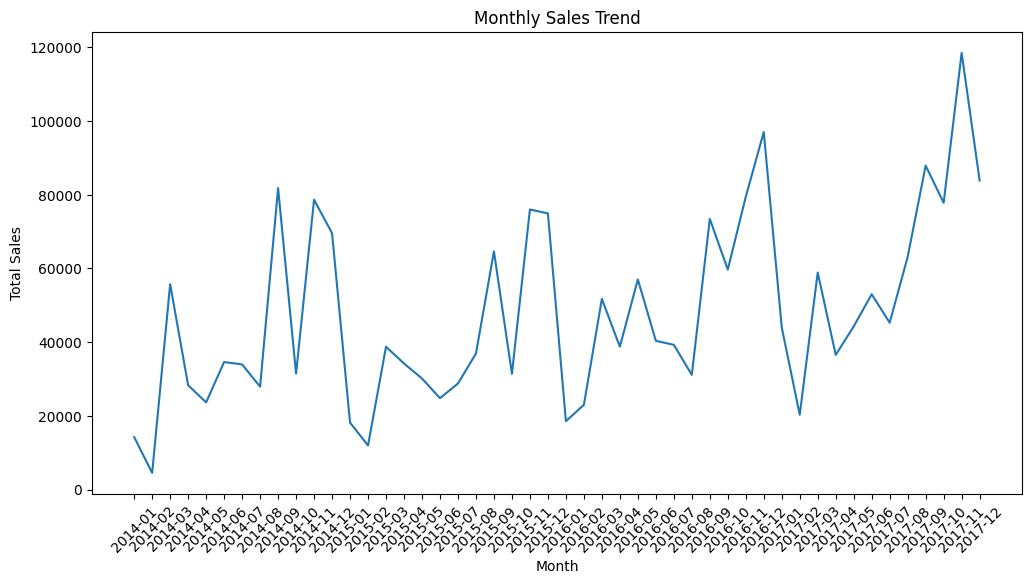

In [20]:
# Extract month-year as string
dataset['Month'] = dataset['Order Date'].dt.to_period('M').astype(str)

# Sales by month
monthly_sales = dataset.groupby('Month')['Sales'].sum().reset_index()

# Plotting sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


How do sales vary by quarter?

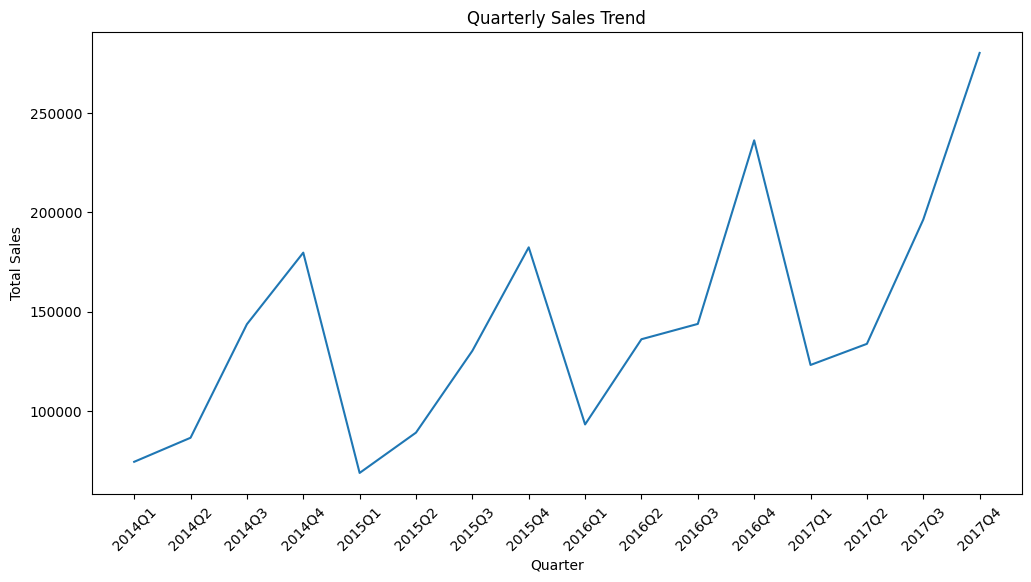

In [22]:
# Extract quarter
dataset['Quarter'] = dataset['Order Date'].dt.to_period('Q').astype(str)

# Sales by quarter
quarterly_sales = dataset.groupby('Quarter')['Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Quarter', y='Sales', data=quarterly_sales)
plt.title('Quarterly Sales Trend')
plt.xticks(rotation=45)
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.show()


What is the average delivery time (Order Date → Ship Date)?

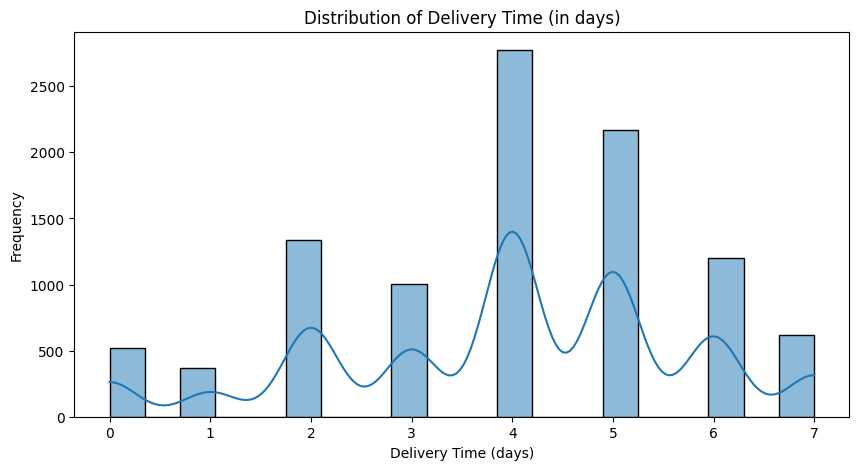

In [23]:
# Ensure 'Ship Date' is datetime format
dataset['Ship Date'] = pd.to_datetime(dataset['Ship Date'])

# Calculate delivery time in days
dataset['Delivery Time'] = (dataset['Ship Date'] - dataset['Order Date']).dt.days

# Plot delivery time distribution
plt.figure(figsize=(10, 5))
sns.histplot(dataset['Delivery Time'], bins=20, kde=True)
plt.title('Distribution of Delivery Time (in days)')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Frequency')
plt.show()


Are there seasonal trends in orders?

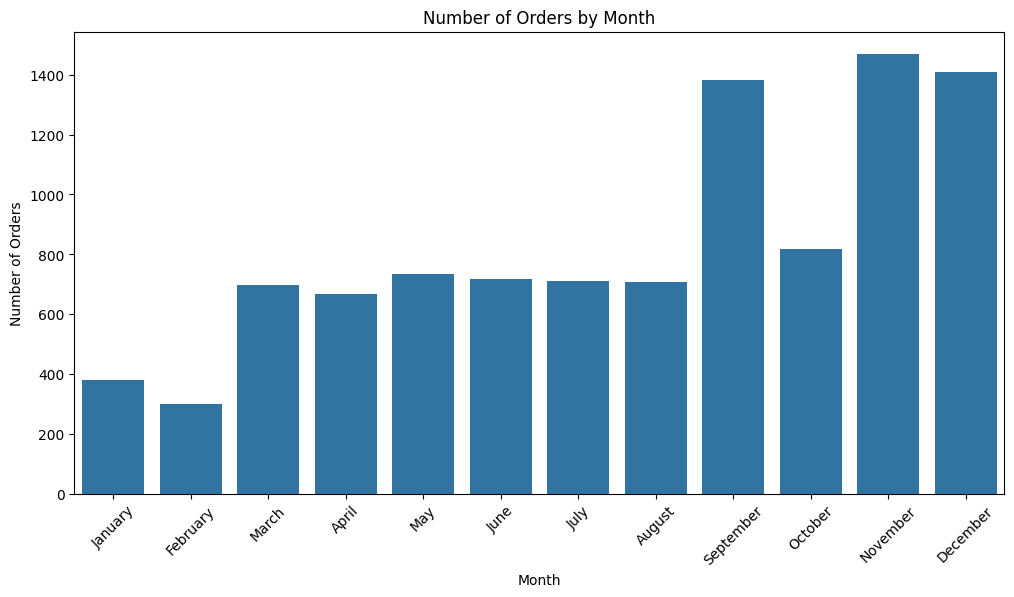

In [24]:
# Extract month names
dataset['Month Name'] = dataset['Order Date'].dt.month_name()

# Count orders by month
monthly_orders = dataset['Month Name'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plot seasonal trends
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_orders.index, y=monthly_orders.values)
plt.title('Number of Orders by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


How do profit and discounts vary over the years?

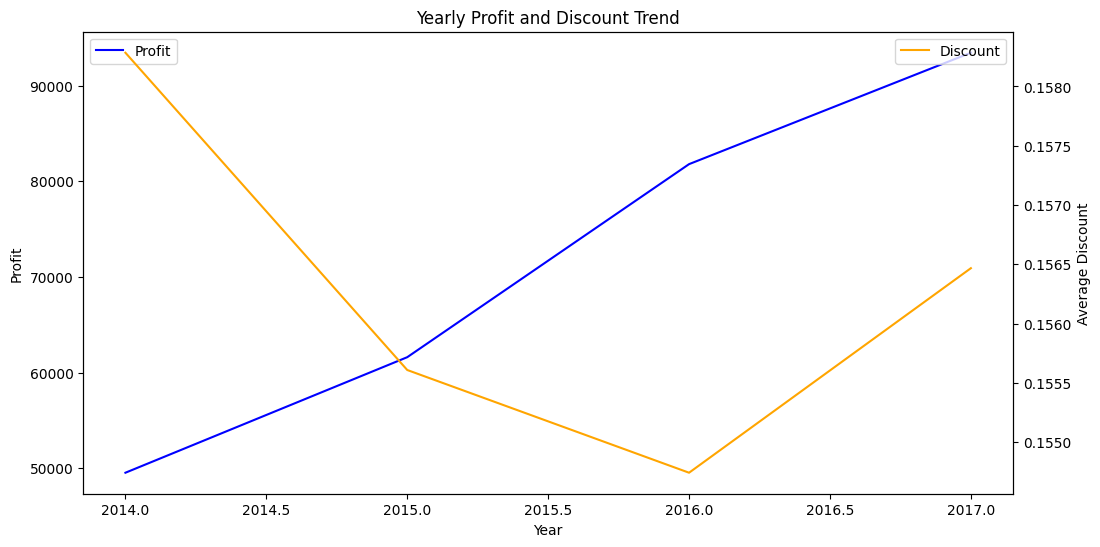

In [25]:
# Aggregating profit and discount by year
yearly_data = dataset.groupby('Year').agg({'Profit': 'sum', 'Discount': 'mean'}).reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Profit line
sns.lineplot(x='Year', y='Profit', data=yearly_data, ax=ax1, label='Profit', color='blue')
ax1.set_ylabel('Profit')

# Discount line on secondary axis
ax2 = ax1.twinx()
sns.lineplot(x='Year', y='Discount', data=yearly_data, ax=ax2, label='Discount', color='orange')
ax2.set_ylabel('Average Discount')

plt.title('Yearly Profit and Discount Trend')
plt.show()


Are there specific days with more orders?

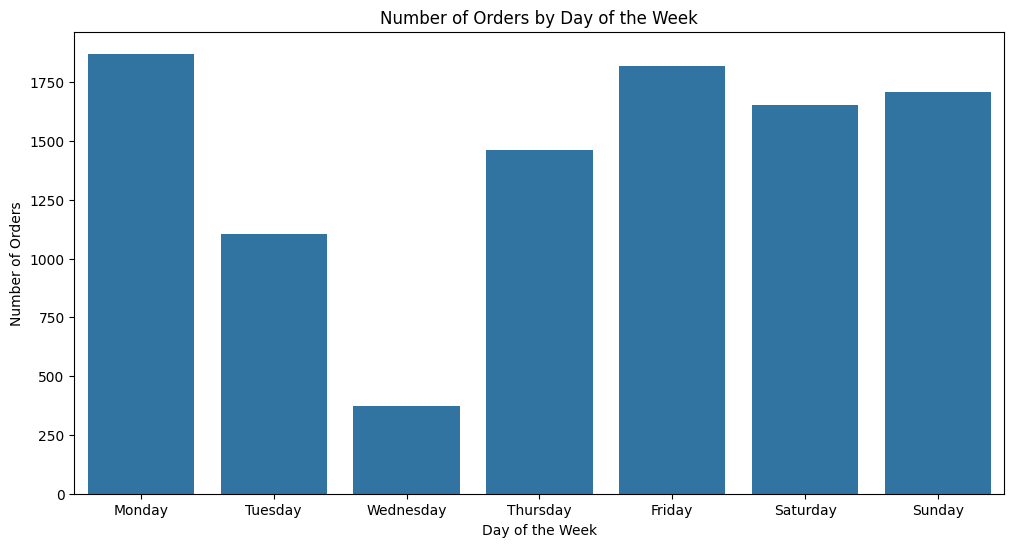

In [27]:
# Extract day of the week
dataset['Day of Week'] = dataset['Order Date'].dt.day_name()

# Count orders by day
orders_by_day = dataset['Day of Week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=orders_by_day.index, y=orders_by_day.values)
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()


What is the year-over-year sales growth percentage?

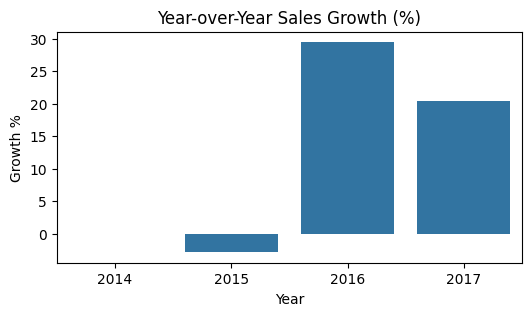

In [29]:
# Yearly sales
yearly_sales = dataset.groupby('Year')['Sales'].sum().reset_index()

# Calculate year-over-year growth
yearly_sales['YoY Growth %'] = yearly_sales['Sales'].pct_change() * 100

# Plot
plt.figure(figsize=(6,3))
sns.barplot(x='Year', y='YoY Growth %', data=yearly_sales)
plt.title('Year-over-Year Sales Growth (%)')
plt.xlabel('Year')
plt.ylabel('Growth %')
plt.show()


What is the average shipping time (difference between Order Date and Ship Date)?

In [30]:
# Calculate shipping time in days
dataset['Shipping Time'] = (dataset['Ship Date'] - dataset['Order Date']).dt.days

# Average shipping time
avg_shipping_time = dataset['Shipping Time'].mean()
print(f"Average Shipping Time: {avg_shipping_time:.2f} days")


Average Shipping Time: 3.96 days


Which shipping mode is the most common and fastest?

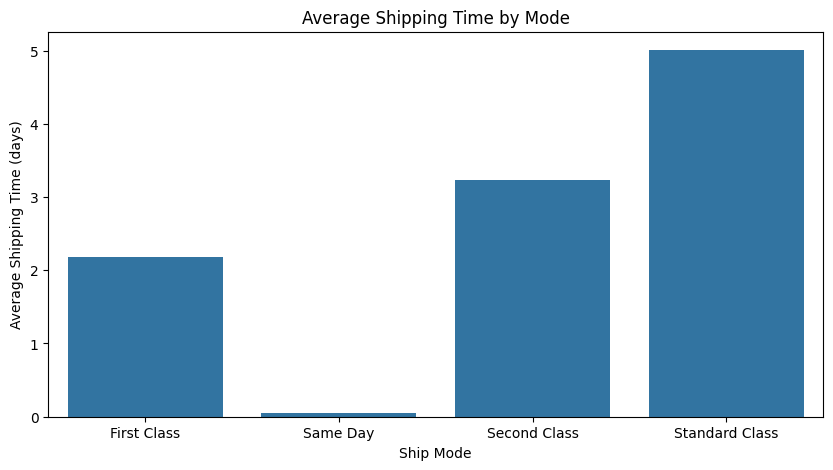

Most Common Shipping Mode: Standard Class


In [31]:
# Average shipping time by mode
shipping_by_mode = dataset.groupby('Ship Mode')['Shipping Time'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Ship Mode', y='Shipping Time', data=shipping_by_mode)
plt.title('Average Shipping Time by Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Average Shipping Time (days)')
plt.show()

# Most common shipping mode
common_mode = dataset['Ship Mode'].value_counts().idxmax()
print(f"Most Common Shipping Mode: {common_mode}")


How does shipping time vary by region?

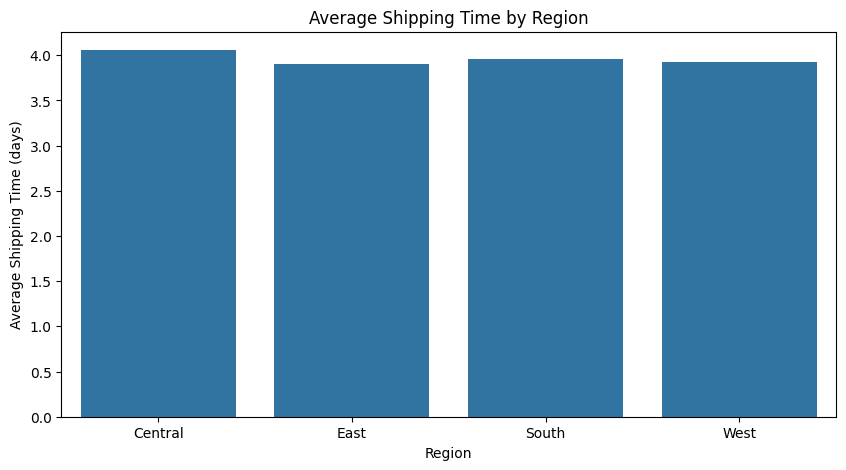

In [32]:
# Average shipping time by region
shipping_by_region = dataset.groupby('Region')['Shipping Time'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Shipping Time', data=shipping_by_region)
plt.title('Average Shipping Time by Region')
plt.xlabel('Region')
plt.ylabel('Average Shipping Time (days)')
plt.show()


How many late shipments are there?

In [33]:
# Identify late shipments (ship date > order date + 4 days)
late_shipments = dataset[dataset['Shipping Time'] > 4]

# Count late shipments
num_late_shipments = late_shipments.shape[0]
total_orders = dataset.shape[0]
late_percentage = (num_late_shipments / total_orders) * 100

print(f"Late Shipments: {num_late_shipments} ({late_percentage:.2f}%)")


Late Shipments: 3993 (39.95%)


Is there a correlation between shipping time and profit?

Correlation between Shipping Time and Profit: -0.0046


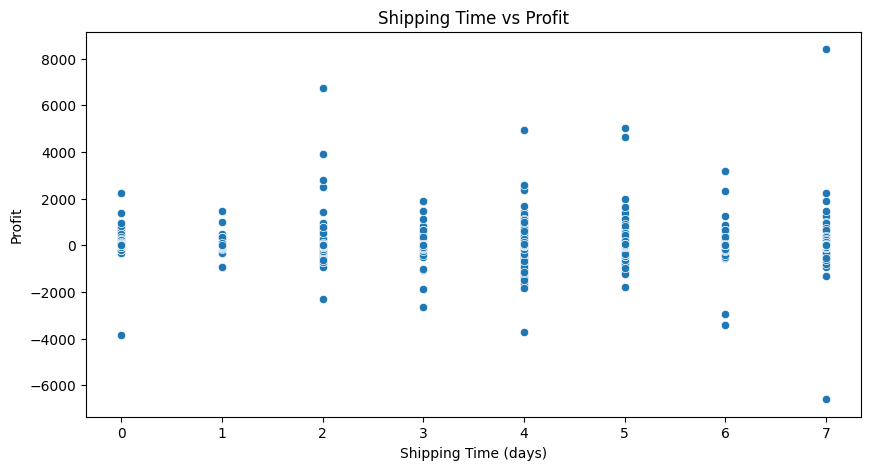

In [34]:
# Correlation between shipping time and profit
correlation = dataset[['Shipping Time', 'Profit']].corr().iloc[0, 1]
print(f"Correlation between Shipping Time and Profit: {correlation:.4f}")

# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Shipping Time', y='Profit', data=dataset)
plt.title('Shipping Time vs Profit')
plt.xlabel('Shipping Time (days)')
plt.ylabel('Profit')
plt.show()


How many unique customers are there?

In [35]:
# Count unique customers
unique_customers = dataset['Customer ID'].nunique()
print(f"Unique Customers: {unique_customers}")


Unique Customers: 793


Which customers have placed the most orders?

Top 5 Customers by Order Frequency:
  Customer ID  Order Count
0    WB-21850           37
1    MA-17560           34
2    JL-15835           34
3    PP-18955           34
4    CK-12205           32


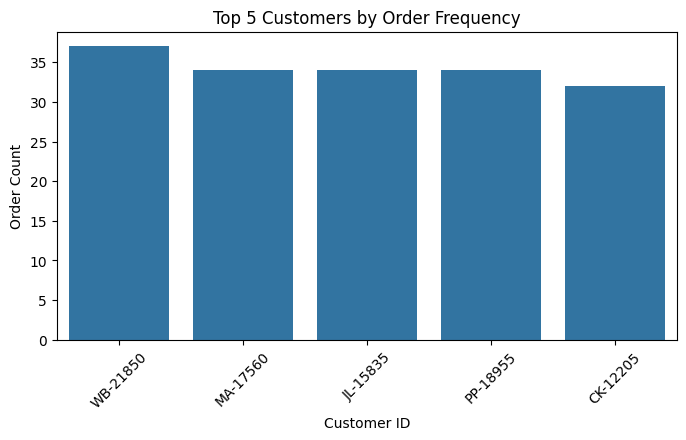

In [40]:
# Count customer occurrences
customer_orders = dataset['Customer ID'].value_counts().reset_index()
customer_orders.columns = ['Customer ID', 'Order Count']

# Top 5 frequent customers
top_customers = customer_orders.head(5)
print("Top 5 Customers by Order Frequency:")
print(top_customers)

plt.figure(figsize=(8, 4))
sns.barplot(x='Customer ID', y='Order Count', data=top_customers)
plt.title('Top 5 Customers by Order Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.show()


What is the distribution of order frequency by customer?

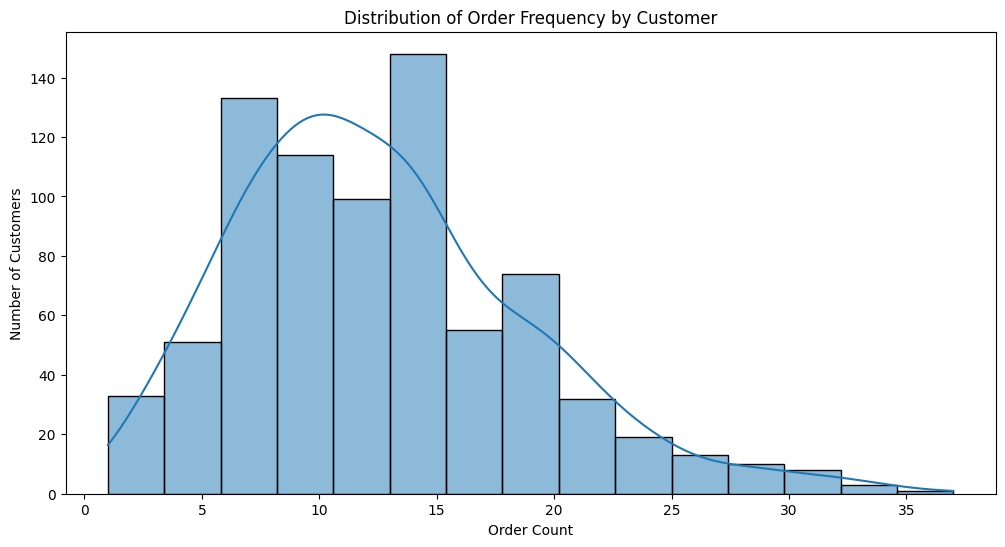

In [41]:
# Plot distribution of customer order frequency
plt.figure(figsize=(12, 6))
sns.histplot(customer_orders['Order Count'], bins=15, kde=True)
plt.title('Distribution of Order Frequency by Customer')
plt.xlabel('Order Count')
plt.ylabel('Number of Customers')
plt.show()


How many one-time customers are there?

In [42]:
# Count one-time customers
one_time_customers = customer_orders[customer_orders['Order Count'] == 1].shape[0]
percentage_one_time = (one_time_customers / unique_customers) * 100

print(f"One-time Customers: {one_time_customers} ({percentage_one_time:.2f}%)")


One-time Customers: 5 (0.63%)


Are there profitable or loss-making customer groups?

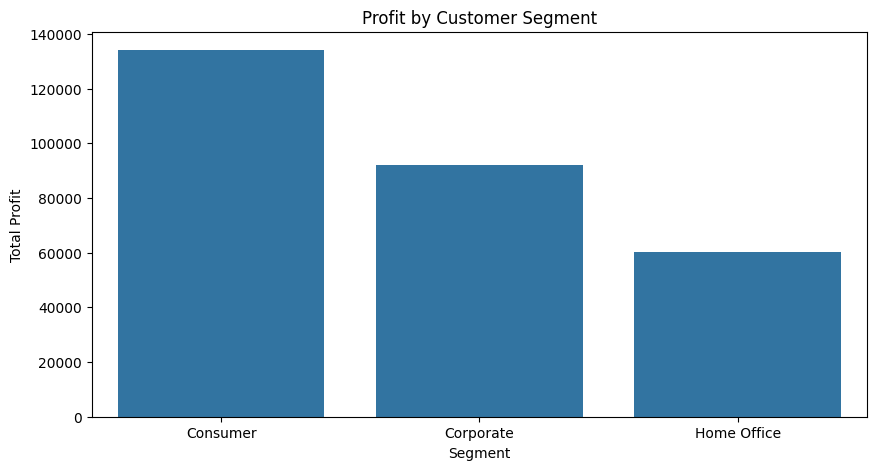

In [45]:
# Profit by segment
profit_by_segment = dataset.groupby('Segment')['Profit'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Segment', y='Profit', data=profit_by_segment)
plt.title('Profit by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.show()


How are the customers distributed by segment?

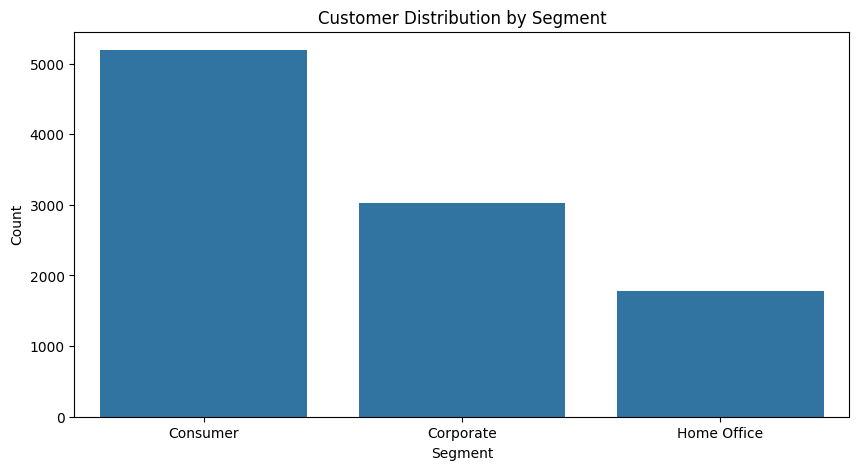

In [46]:
# Customer distribution by segment
segment_distribution = dataset['Segment'].value_counts().reset_index()
segment_distribution.columns = ['Segment', 'Count']

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Segment', y='Count', data=segment_distribution)
plt.title('Customer Distribution by Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()


Which states have the most orders?

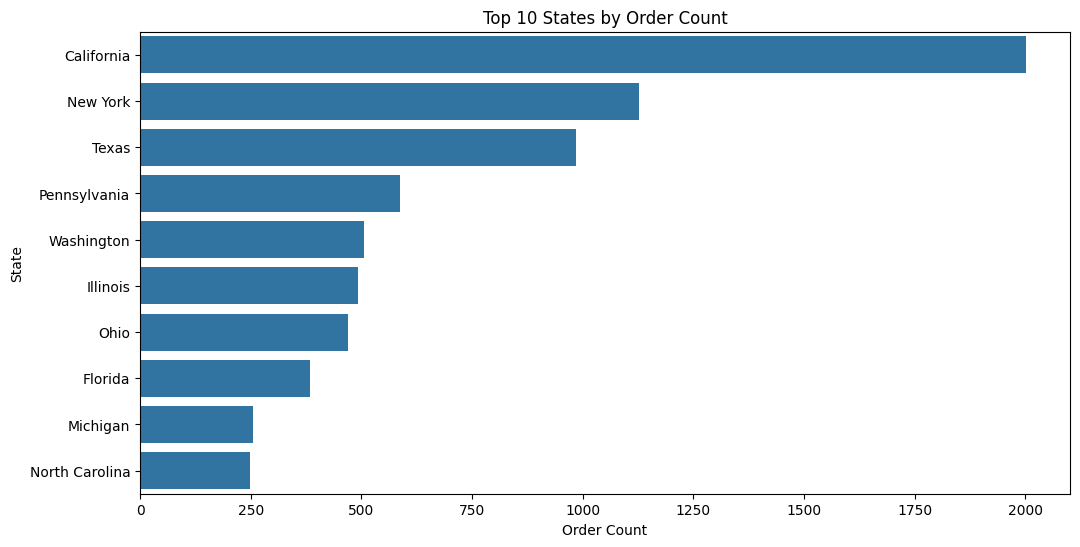

In [47]:
# Order frequency by state
state_orders = dataset['State'].value_counts().reset_index()
state_orders.columns = ['State', 'Order Count']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Count', y='State', data=state_orders.head(10))
plt.title('Top 10 States by Order Count')
plt.xlabel('Order Count')
plt.ylabel('State')
plt.show()


Which states have the highest total sales?

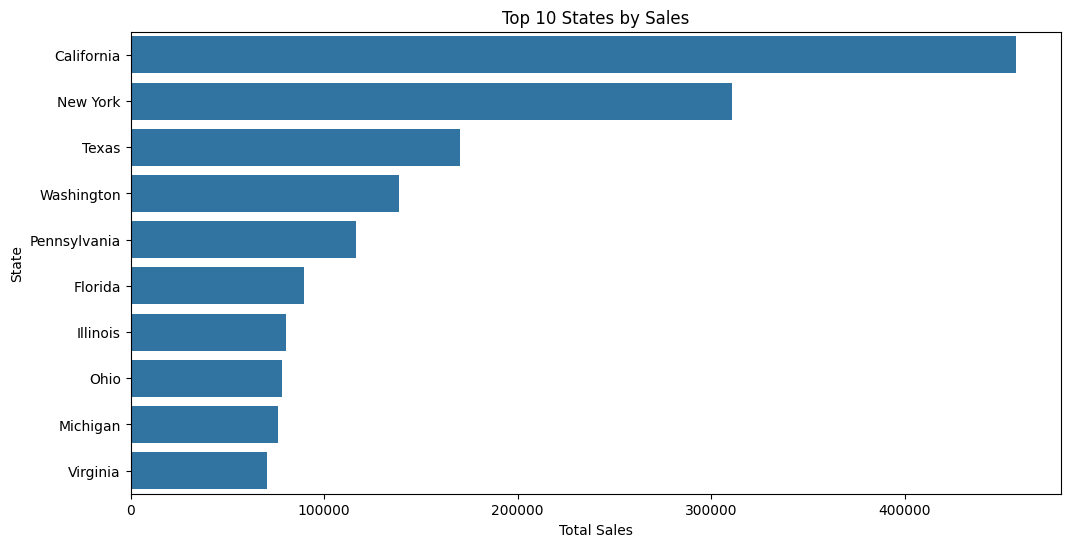

In [48]:
# Sales by state
state_sales = dataset.groupby('State')['Sales'].sum().reset_index().sort_values('Sales', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='State', data=state_sales.head(10))
plt.title('Top 10 States by Sales')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.show()


Which states have the highest profit/loss?

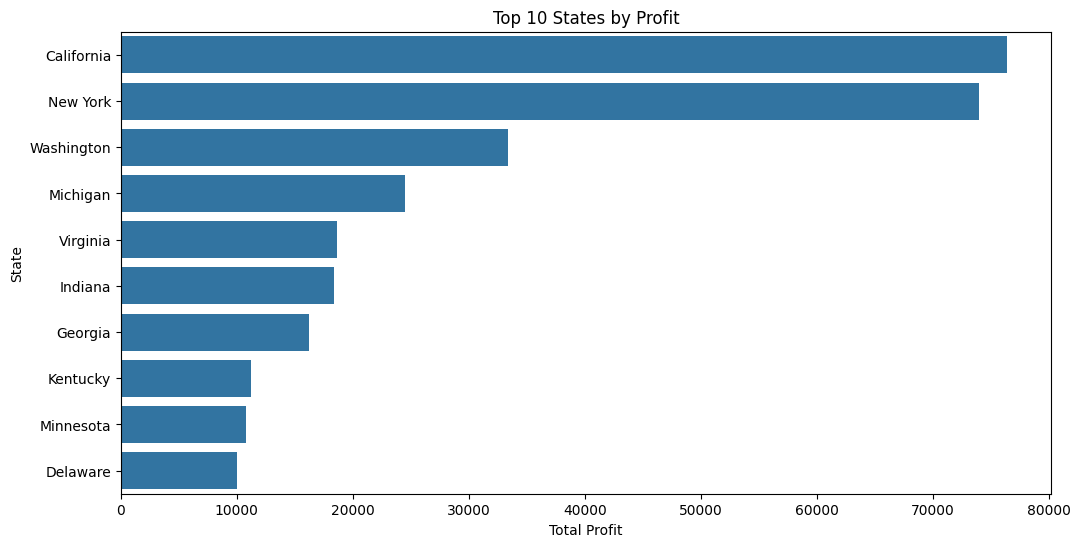

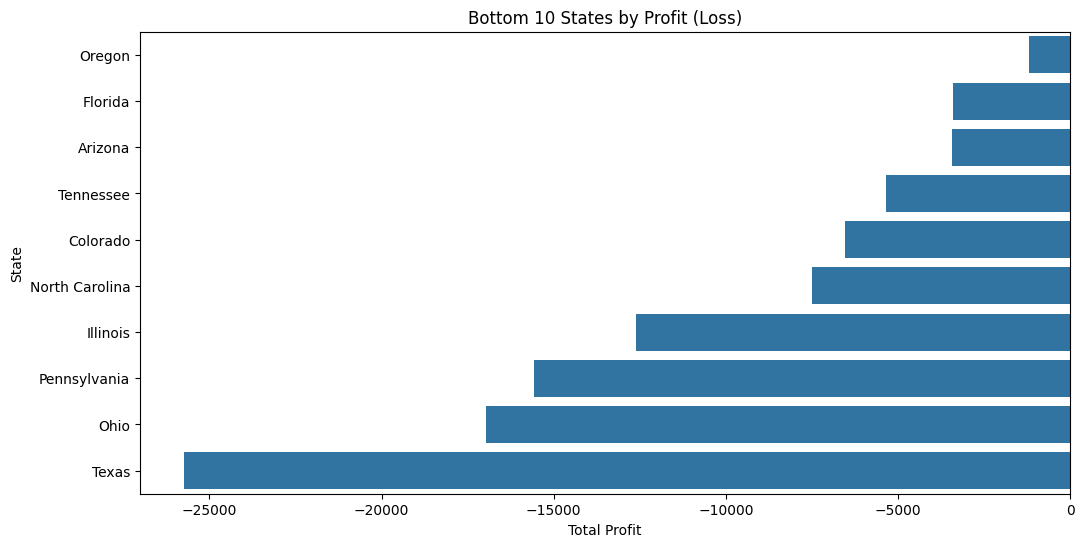

In [50]:
state_profit = dataset.groupby('State')['Profit'].sum().reset_index().sort_values('Profit', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Profit', y='State', data=state_profit.head(10))
plt.title('Top 10 States by Profit')
plt.xlabel('Total Profit')
plt.ylabel('State')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Profit', y='State', data=state_profit.tail(10))
plt.title('Bottom 10 States by Profit (Loss)')
plt.xlabel('Total Profit')
plt.ylabel('State')
plt.show()


Which cities have the most orders?

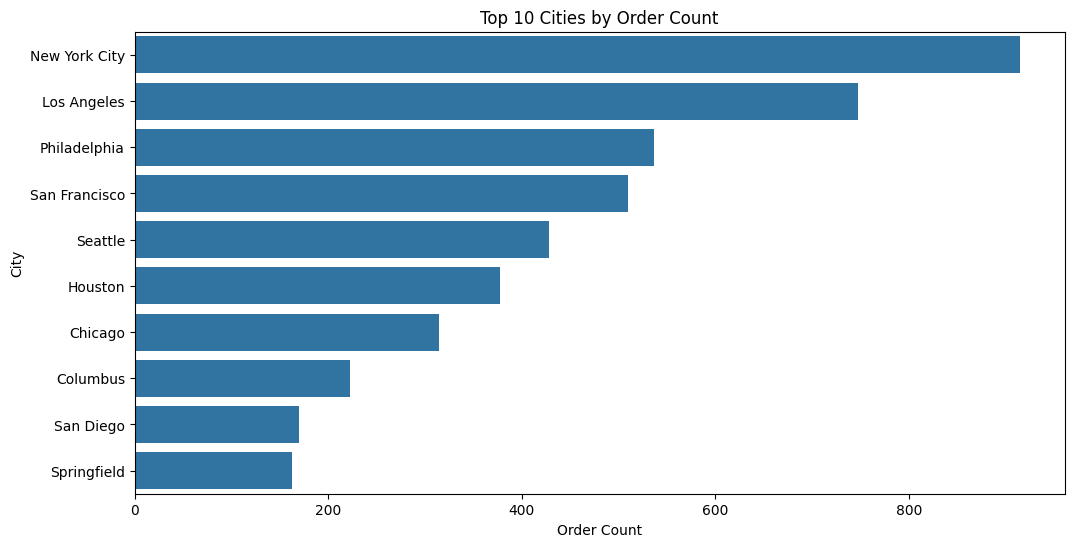

In [51]:
# Order frequency by city
city_orders = dataset['City'].value_counts().reset_index()
city_orders.columns = ['City', 'Order Count']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Count', y='City', data=city_orders.head(10))
plt.title('Top 10 Cities by Order Count')
plt.xlabel('Order Count')
plt.ylabel('City')
plt.show()


What is the distribution of orders across categories?

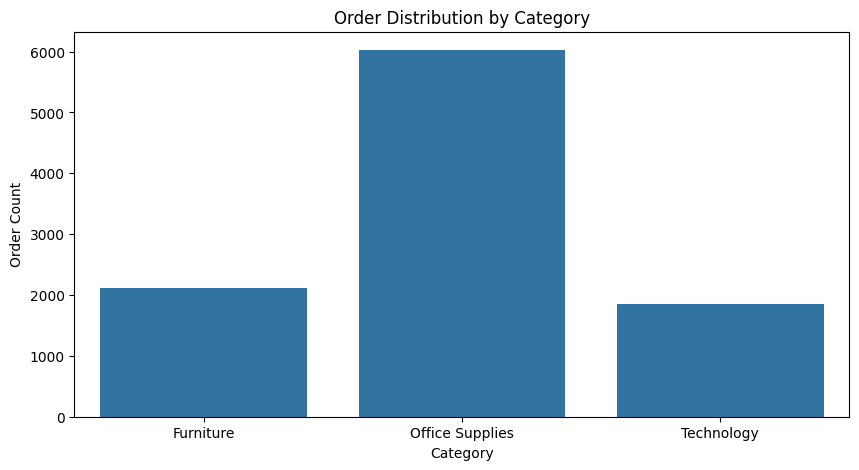

In [52]:
# Distribution of orders by category
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=dataset)
plt.title('Order Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Order Count')
plt.show()


What is the average discount by category?

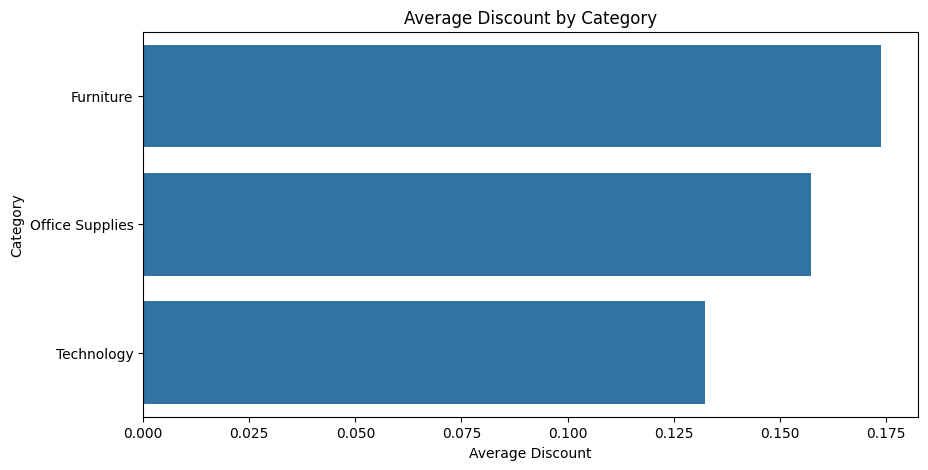

In [53]:
# Average discount by category
category_discount = dataset.groupby('Category')['Discount'].mean().reset_index().sort_values('Discount', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Discount', y='Category', data=category_discount)
plt.title('Average Discount by Category')
plt.xlabel('Average Discount')
plt.ylabel('Category')
plt.show()


 What is the average profit margin by category?

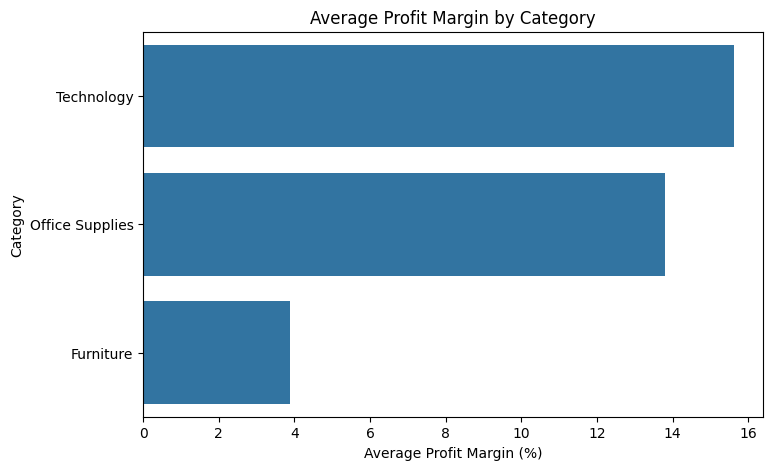

In [55]:
# Average profit margin by category
dataset['Profit Margin'] = (dataset['Profit'] / dataset['Sales']) * 100
category_margin = dataset.groupby('Category')['Profit Margin'].mean().reset_index().sort_values('Profit Margin', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Profit Margin', y='Category', data=category_margin)
plt.title('Average Profit Margin by Category')
plt.xlabel('Average Profit Margin (%)')
plt.ylabel('Category')
plt.show()


What is the distribution of orders by sub-category?

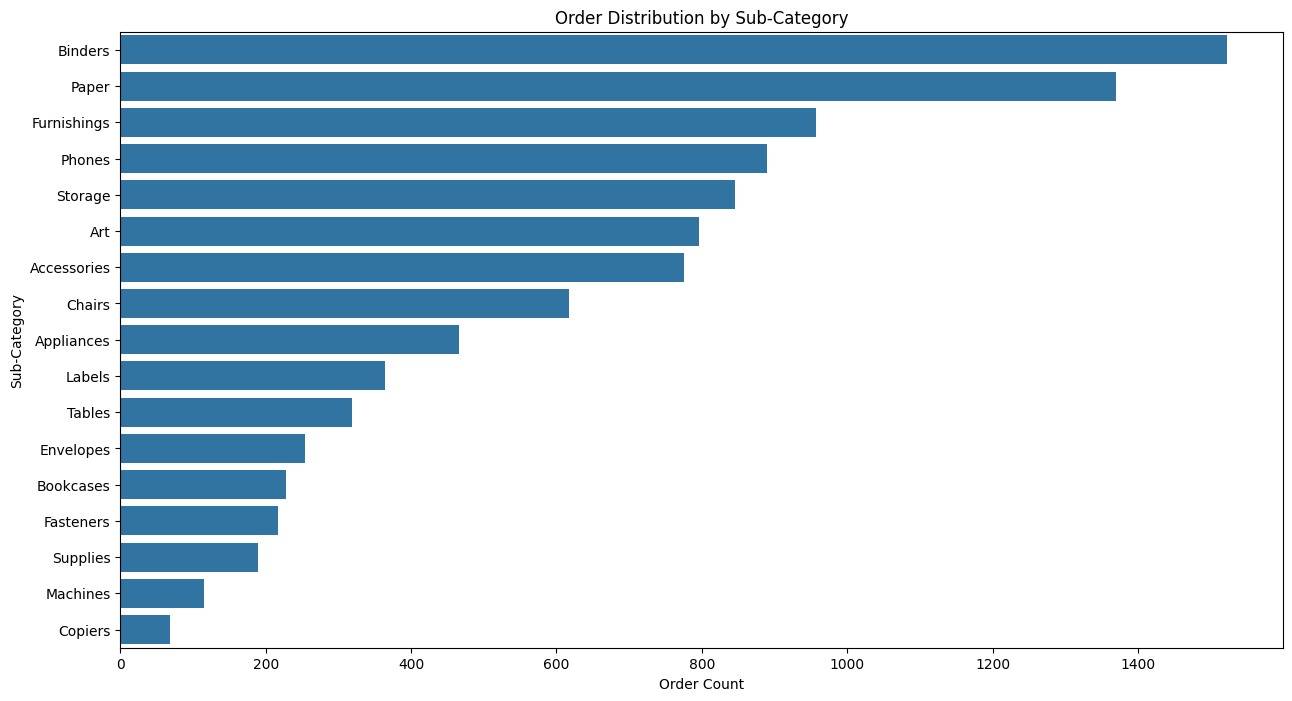

In [56]:
# Distribution of orders by sub-category
plt.figure(figsize=(15, 8))
sns.countplot(y='Sub-Category', data=dataset, order=dataset['Sub-Category'].value_counts().index)
plt.title('Order Distribution by Sub-Category')
plt.xlabel('Order Count')
plt.ylabel('Sub-Category')
plt.show()


 Are there loss-making sub-categories?

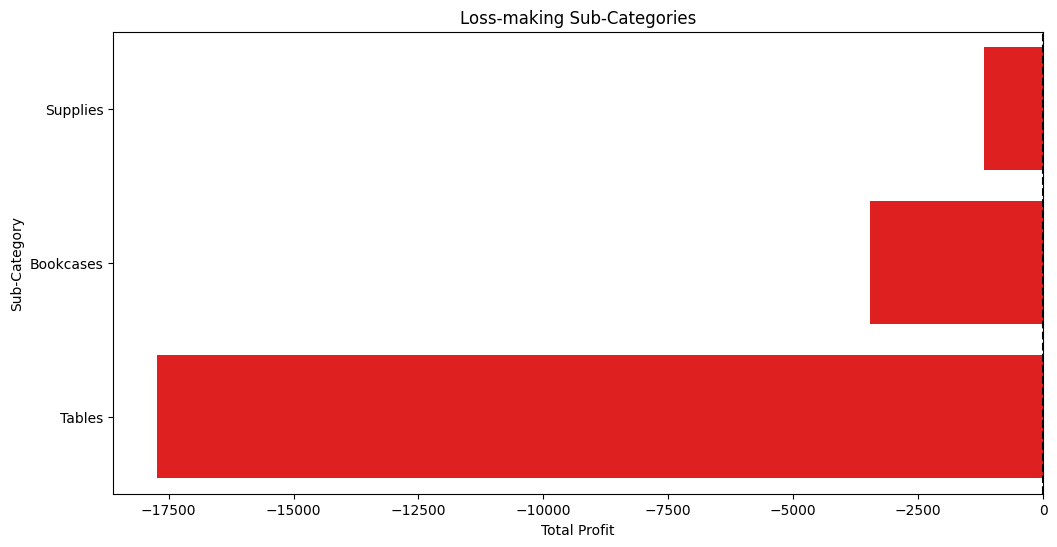

In [60]:
# Calculate total profit by sub-category
subcategory_profit = dataset.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values('Profit', ascending=False)

# Filter for loss-making sub-categories
loss_subcategories = subcategory_profit[subcategory_profit['Profit'] < 0]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Profit', y='Sub-Category', data=loss_subcategories, color='red')

# Customize plot
plt.title('Loss-making Sub-Categories')
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')
plt.axvline(0, color='black', linestyle='--')  # Add a vertical line at 0 profit
plt.show()



What is the total sales in the dataset?

In [63]:
# Total sales
total_sales = dataset['Sales'].sum()
print(f"Total Sales: ${total_sales:.2f}")

# Average sales per order
average_sales = dataset['Sales'].mean()
print(f"Average Sales per Order: ${average_sales:.2f}")

# Median sales
median_sales = dataset['Sales'].median()
print(f"Median Sales: ${median_sales:.2f}")


Total Sales: $2297200.86
Average Sales per Order: $229.86
Median Sales: $54.49


What is the sales distribution ?

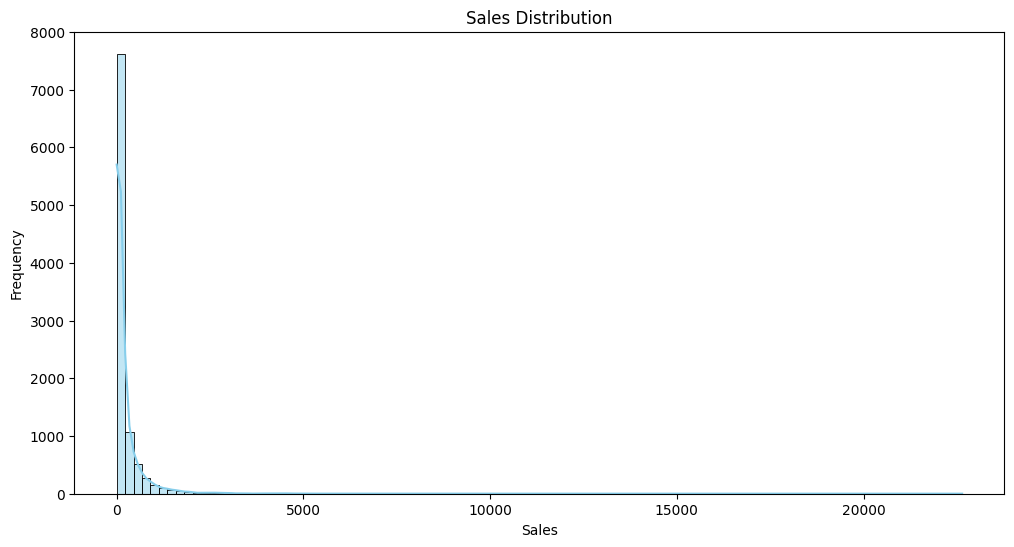

In [65]:
# Sales distribution histogram
plt.figure(figsize=(12, 6))
sns.histplot(dataset['Sales'], bins=100, kde=True, color='skyblue')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


What is the correlation between sales and profit?

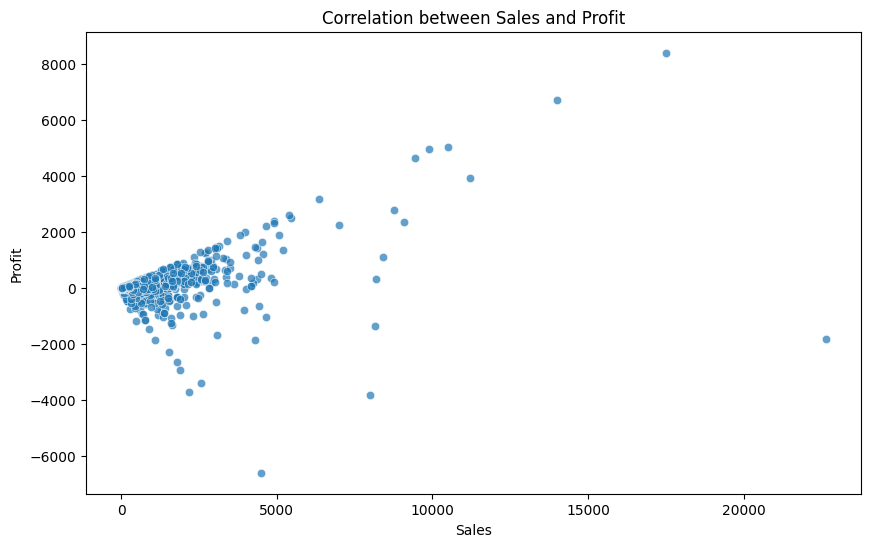

In [66]:
# Correlation between sales and profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=dataset, alpha=0.7)
plt.title('Correlation between Sales and Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


What is the correlation between sales and discount?

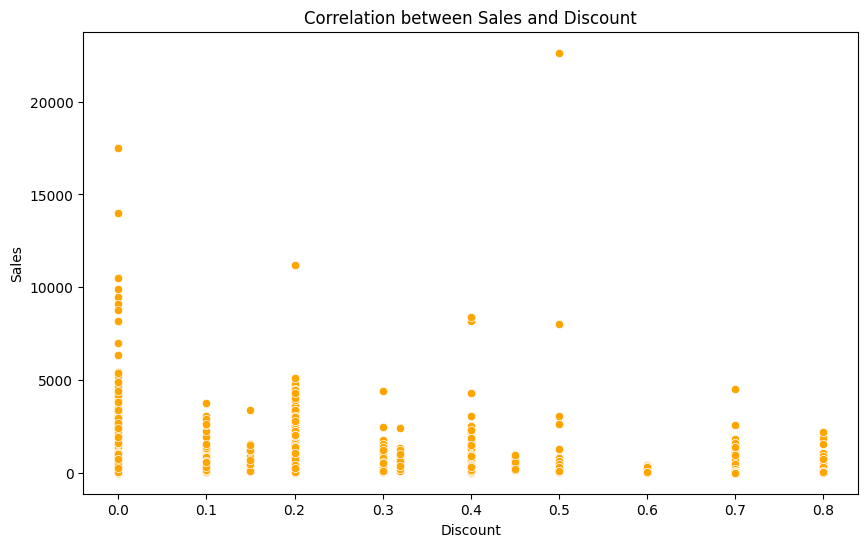

In [67]:
# Correlation between sales and discount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Sales', data=dataset, color='orange')
plt.title('Correlation between Sales and Discount')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()


What is the top 10 products by sales?

C:\Users\Abhishek upadhyay\AppData\Local\Temp\ipykernel_14436\3637087065.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Product Name', data=top_products, palette='pastel')


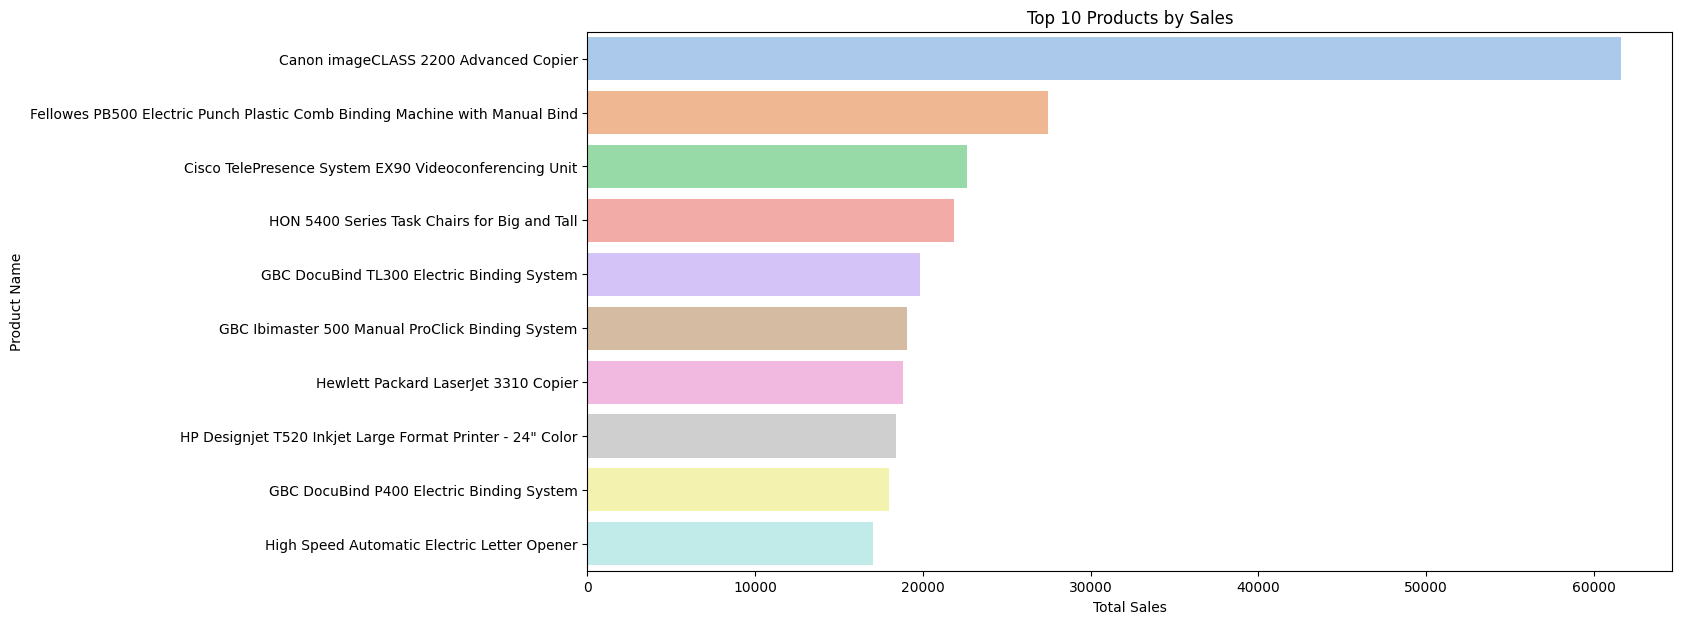

In [68]:
# Top 10 products by sales
top_products = dataset.groupby('Product Name')['Sales'].sum().reset_index().sort_values('Sales', ascending=False).head(10)

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(x='Sales', y='Product Name', data=top_products, palette='pastel')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()


Are there outliers in the sales data?

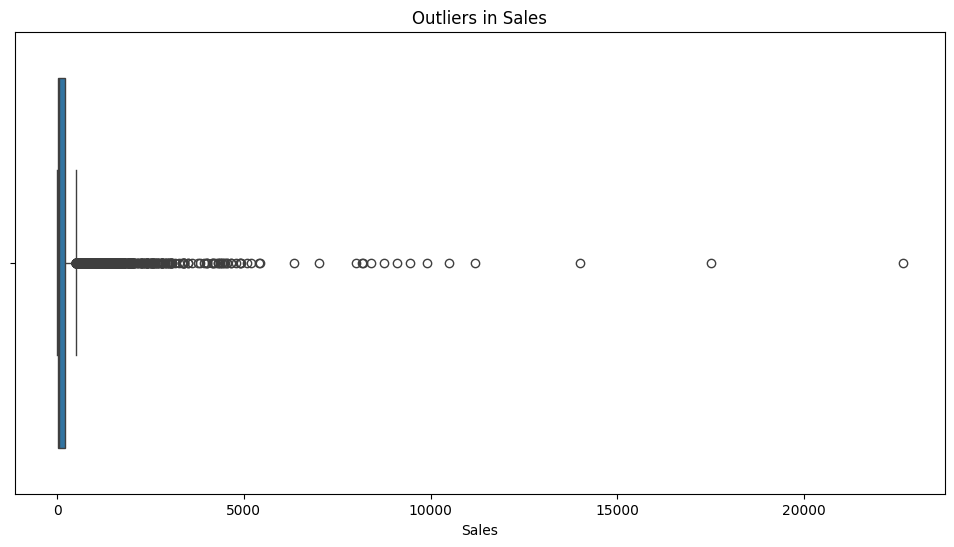

In [69]:
# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sales', data=dataset)
plt.title('Outliers in Sales')
plt.xlabel('Sales')
plt.show()


The plot will show the count of orders by Ship Mode, with bars segmented by Category, allowing you to compare how different product categories are distributed across various shipping methods

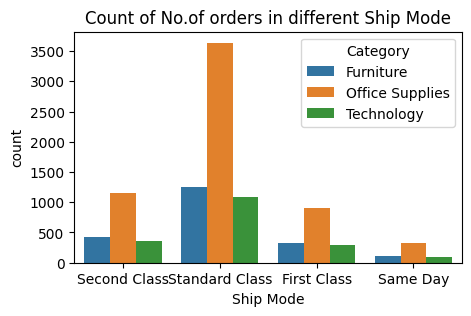

In [58]:
plt.figure(figsize = (5,3))
sns.countplot(x = "Ship Mode", data = dataset, hue = "Category")
plt.title('Count of No.of orders in different Ship Mode')
plt.show()

This visualization helps compare the distribution of orders across categories and their sub-categories. 

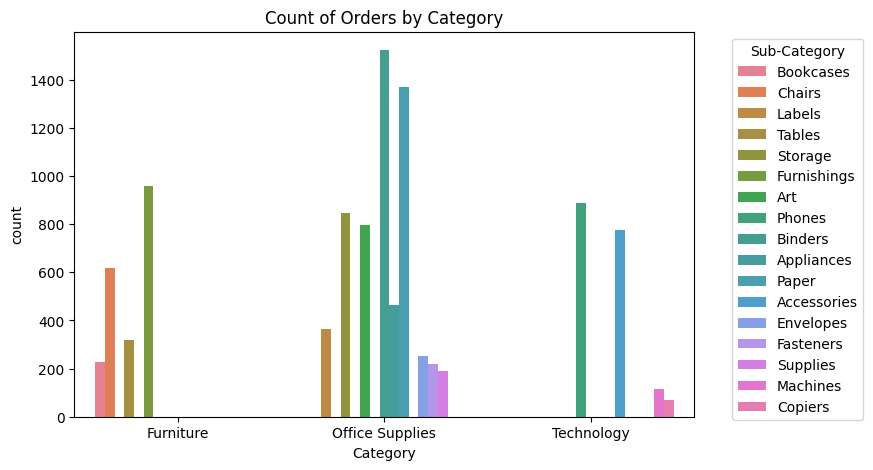

In [64]:
plt.figure(figsize=(8, 5))  # Adjust the figure size
sns.countplot(x="Category", data=dataset, hue="Sub-Category")
plt.title('Count of Orders by Category')
# Move the legend outside the plot
plt.legend(title="Sub-Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

What is the relationship between Sales, Profit, and Discount?

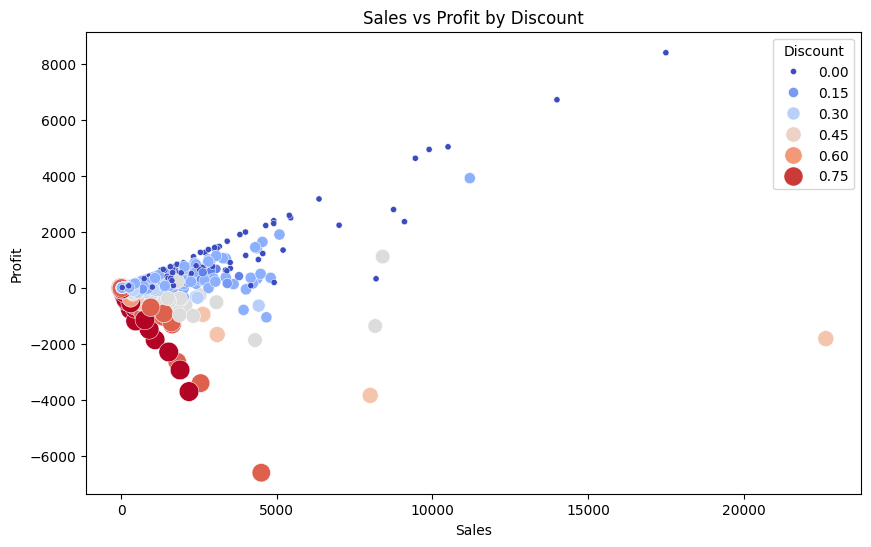

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', hue='Discount', size='Discount', data=dataset, palette='coolwarm', sizes=(20, 200))
plt.title('Sales vs Profit by Discount')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


Which product categories have the highest discounts and how do they affect profits?

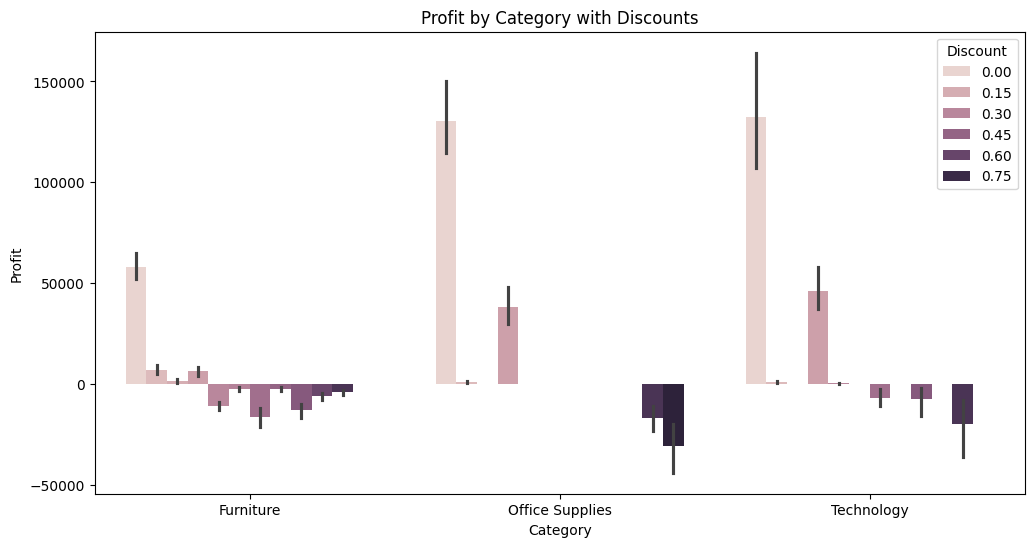

In [71]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Profit', hue='Discount', data=dataset, estimator=sum)
plt.title('Profit by Category with Discounts')
plt.show()


How does Quantity, Sales, and Profit vary by Category?

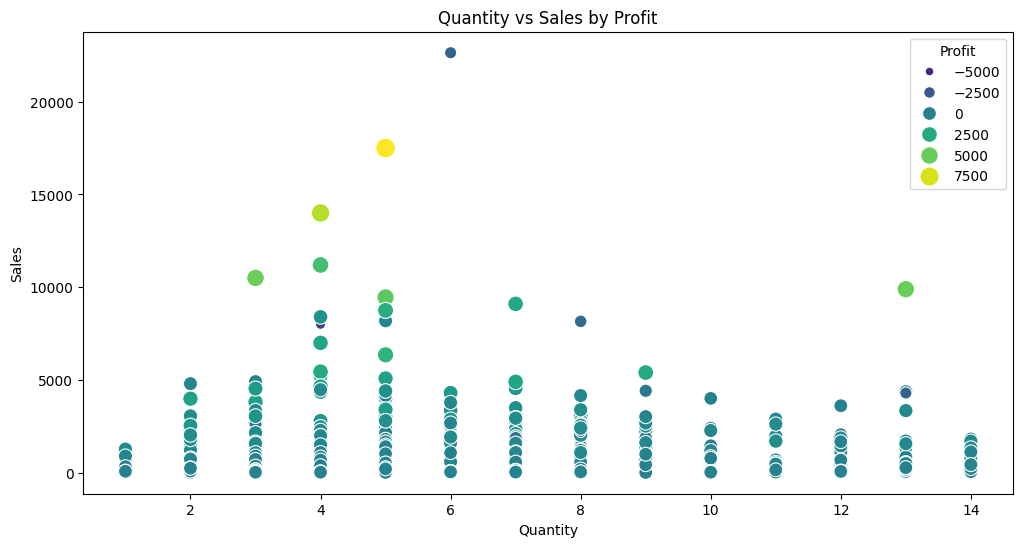

In [72]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Quantity', y='Sales', hue='Profit', size='Profit', data=dataset, palette='viridis', sizes=(20, 200))
plt.title('Quantity vs Sales by Profit')
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.show()


Are there seasonal trends in Sales, Profit, and Quantity?

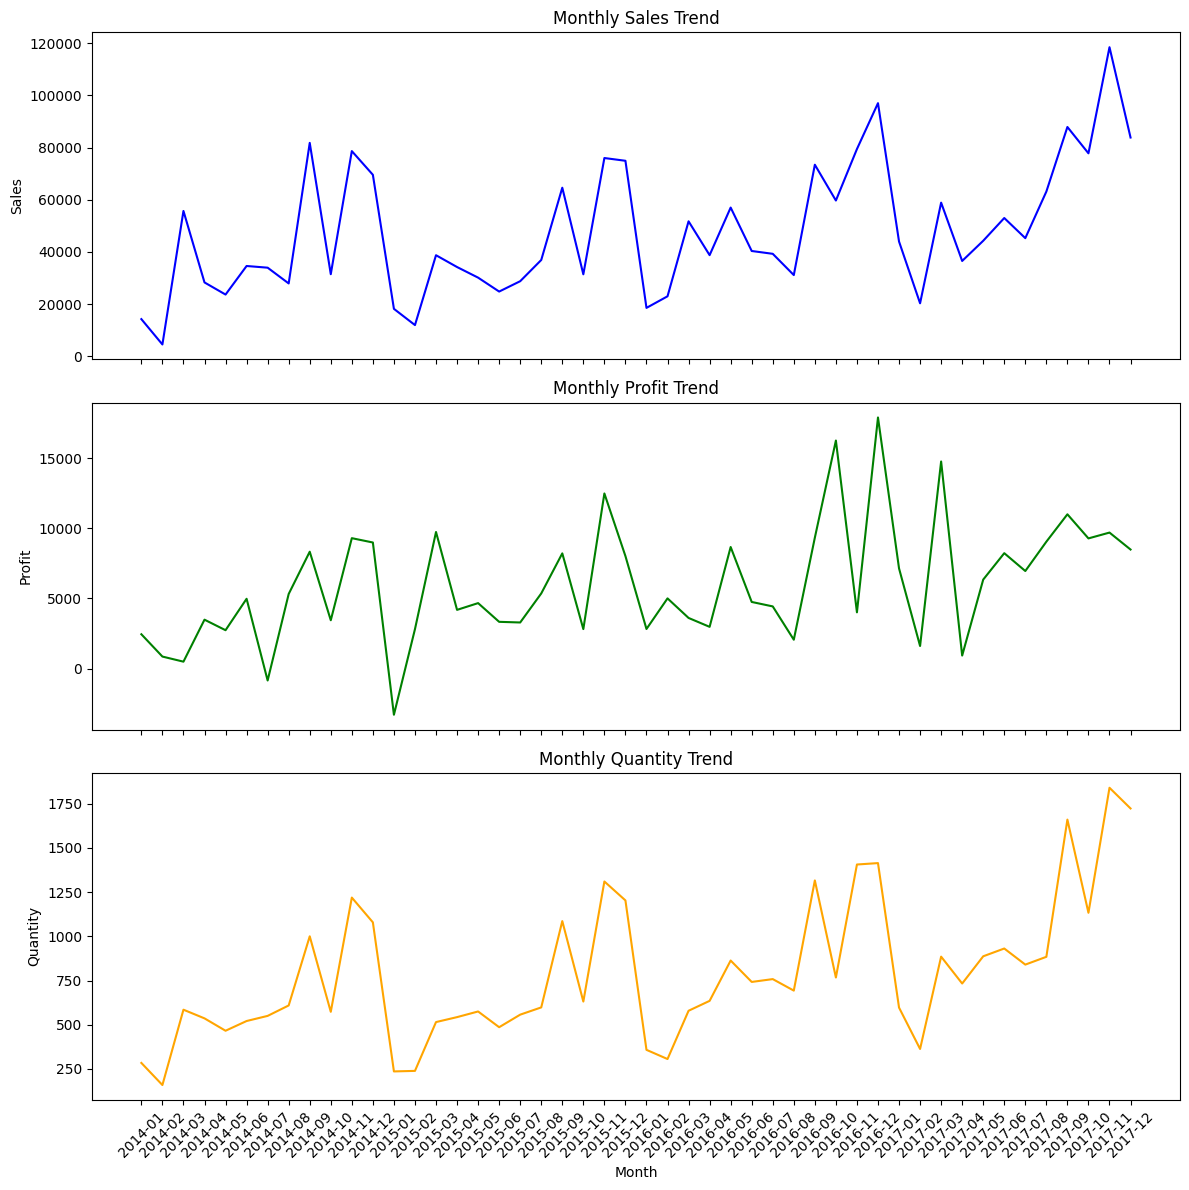

In [75]:
# Extract month and year
dataset['Month'] = dataset['Order Date'].dt.to_period('M').astype(str)

# Group by month
monthly_trend = dataset.groupby('Month').agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index()

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

sns.lineplot(x='Month', y='Sales', data=monthly_trend, ax=axes[0], color='blue')
axes[0].set_title('Monthly Sales Trend')

sns.lineplot(x='Month', y='Profit', data=monthly_trend, ax=axes[1], color='green')
axes[1].set_title('Monthly Profit Trend')

sns.lineplot(x='Month', y='Quantity', data=monthly_trend, ax=axes[2], color='orange')
axes[2].set_title('Monthly Quantity Trend')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Which regions are the most profitable and which suffer losses?

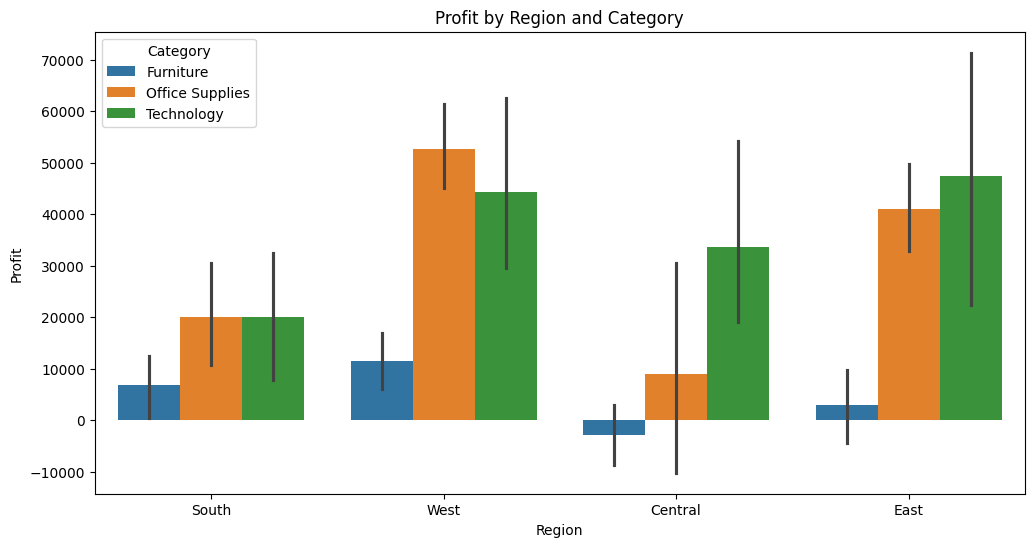

In [76]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Profit', hue='Category', data=dataset, estimator=sum)
plt.title('Profit by Region and Category')
plt.show()


What is the relationship between Ship Mode, Sales, and Profit?

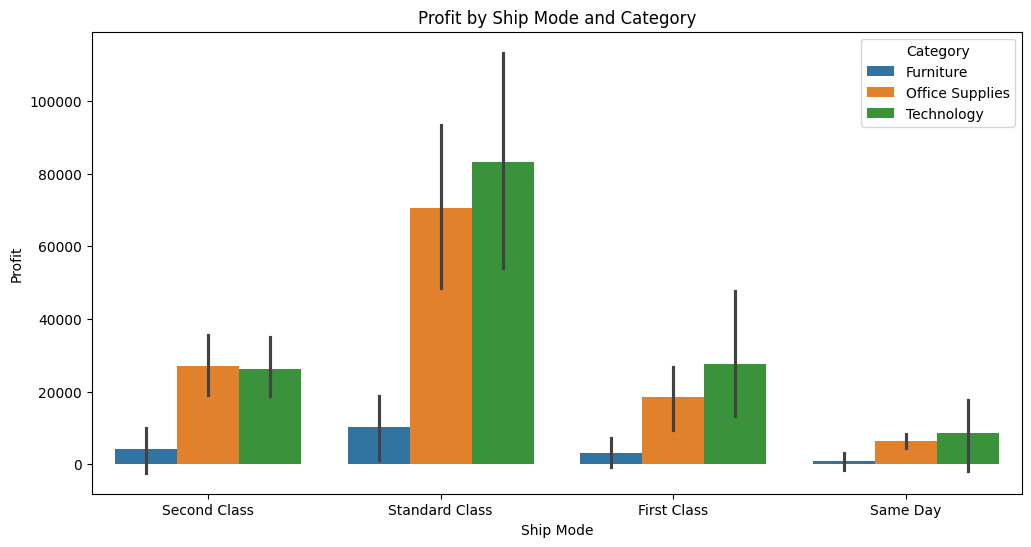

In [77]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Ship Mode', y='Profit', hue='Category', data=dataset, estimator=sum)
plt.title('Profit by Ship Mode and Category')
plt.show()


How does Sales and Profit vary by State and Region?

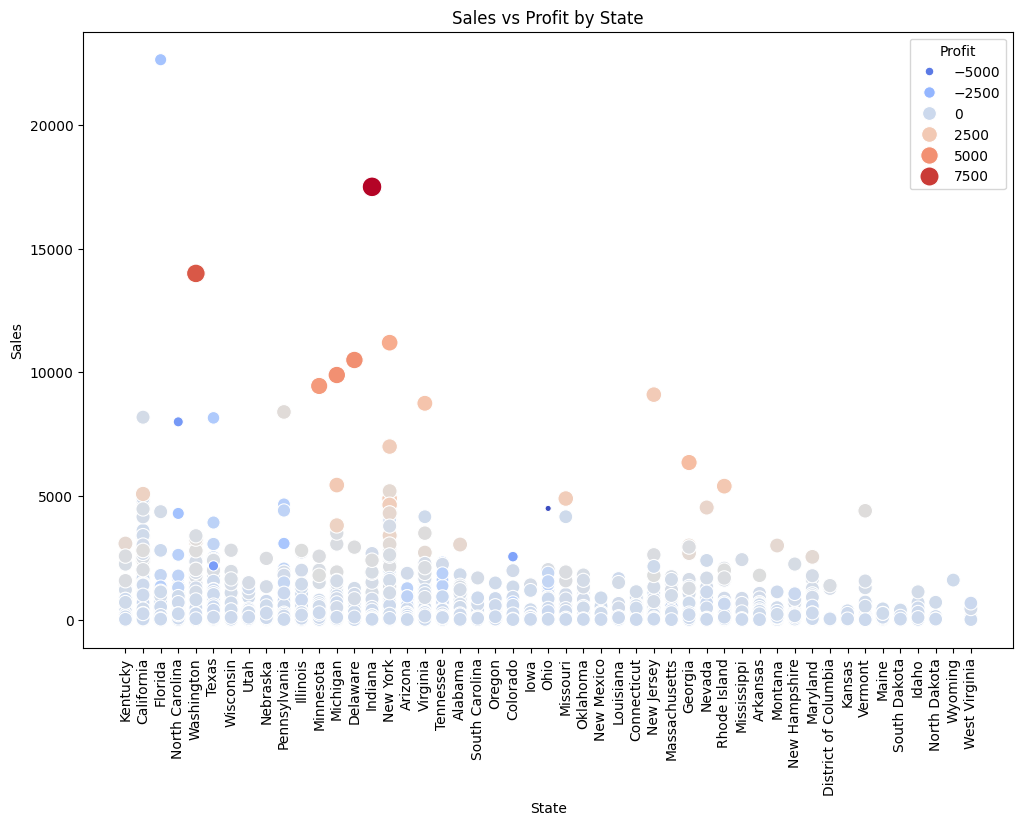

In [78]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='State', y='Sales', hue='Profit', size='Profit', data=dataset, palette='coolwarm', sizes=(20, 200))
plt.xticks(rotation=90)
plt.title('Sales vs Profit by State')
plt.show()


Which products generate high sales but low profits?

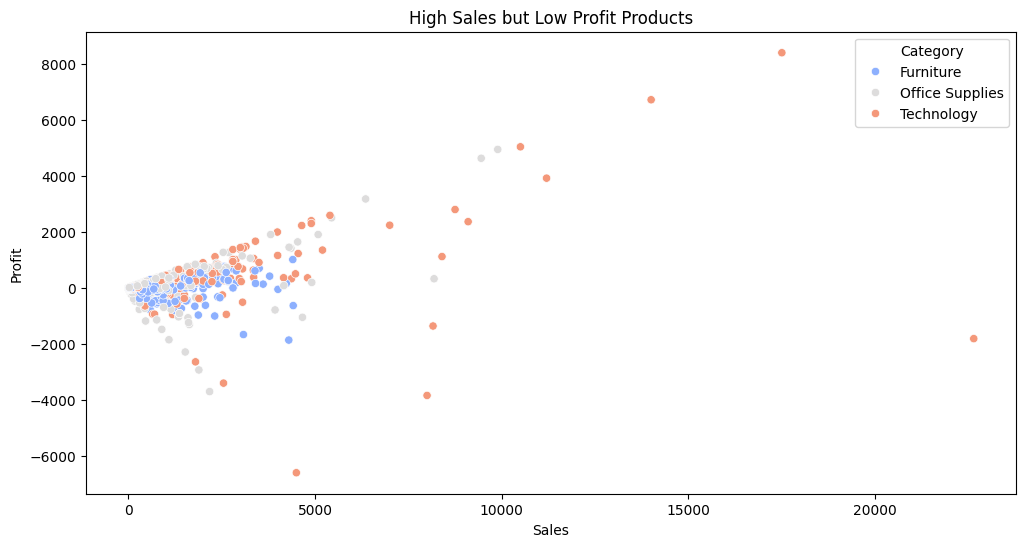

In [79]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sales', y='Profit', hue='Category', data=dataset, palette='coolwarm')
plt.title('High Sales but Low Profit Products')
plt.show()


How does Profit vary with Quantity across Categories?

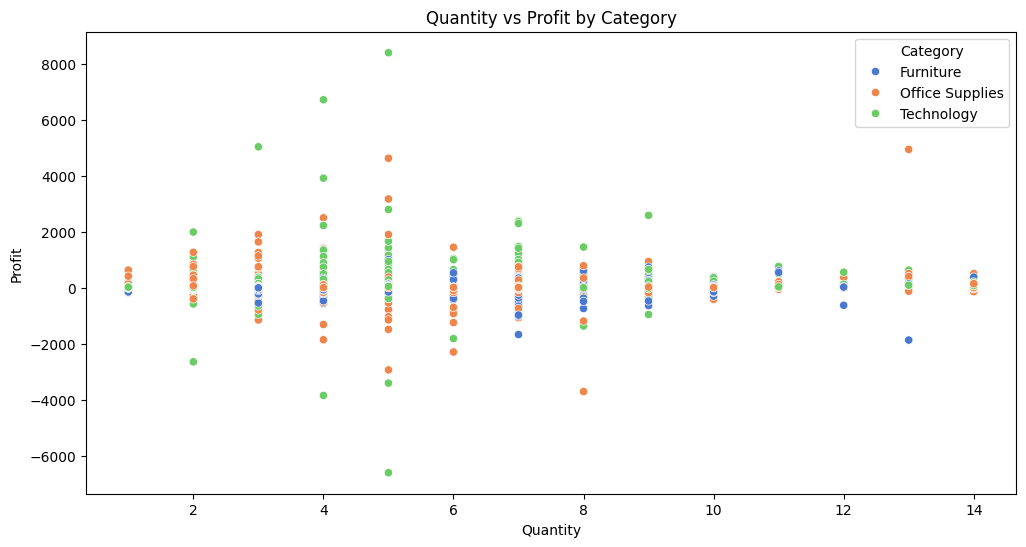

In [80]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Quantity', y='Profit', hue='Category', data=dataset, palette='muted')
plt.title('Quantity vs Profit by Category')
plt.show()


Are there any correlations between Sales, Profit, and Quantity?

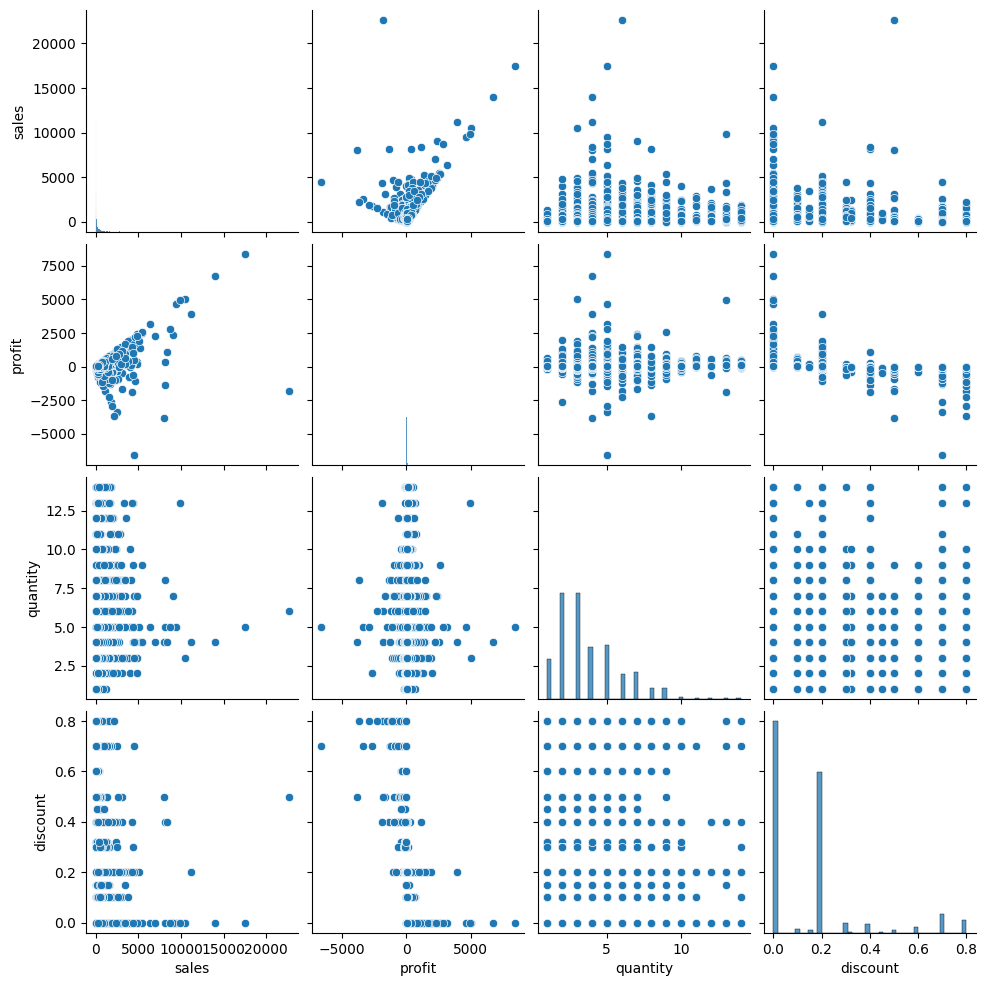

In [93]:
sns.pairplot(dataset[['sales', 'profit', 'quantity', 'discount']])
plt.show()


Which Sub-Category contributes the most and least to the overall profit?

C:\Users\Abhishek upadhyay\AppData\Local\Temp\ipykernel_6744\1797967547.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='Sub-Category', data=profit_by_subcat, palette='viridis')


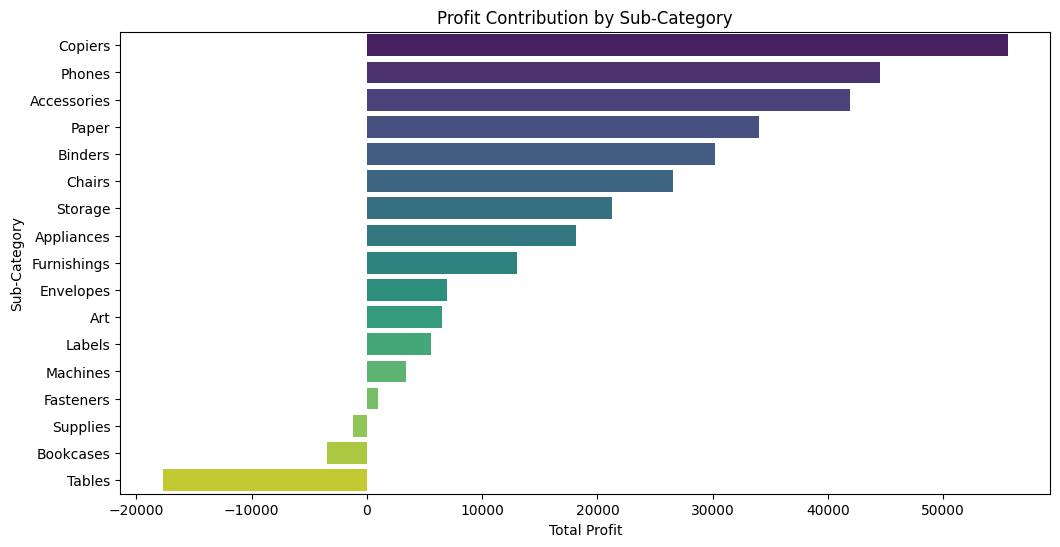

In [5]:
# Group by Sub-Category and sum the Profit
profit_by_subcat = dataset.groupby('Sub-Category')['Profit'].sum().reset_index()

# Sort by Profit
profit_by_subcat = profit_by_subcat.sort_values('Profit', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Profit', y='Sub-Category', data=profit_by_subcat, palette='viridis')
plt.title('Profit Contribution by Sub-Category')
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')
plt.show()
